In [22]:
%%capture
%run 01_Data_Preparation.ipynb
%run 03_Model_RNN_BNN.ipynb

# Input pipeline

In [4]:
# prepare data generators using tf.data
train_dataset = tf.data.Dataset.from_tensor_slices((z_train,mu_train)).shuffle(TRAIN_LENGTH, reshuffle_each_iteration=True).batch(BATCH_SIZE);
#test_dataset = tf.data.Dataset.from_tensor_slices((z_test,mu_test)).batch(BATCH_SIZE);
val_dataset = tf.data.Dataset.from_tensor_slices((z_val,mu_val)).batch(BATCH_SIZE);

# Train

In [17]:
model = my_model()

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.RootMeanSquaredError())

In [7]:
# Create a callback that saves the model's weights
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(out_dir,'cp.ckpt'), 
    monitor='val_loss', 
    save_weights_only=True, 
    verbose=1, 
    save_best_only=True
    )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=10, verbose=1,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=1e-10
)

early_stopping = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=0,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=500,
        verbose=1
    )
]

model_history = model.fit(train_dataset,
                          epochs=EPOCHS,
                          validation_data=val_dataset,
                          callbacks=[checkpoint, early_stopping]
                          )

Epoch 1/10000


2022-04-25 15:59:19.229010: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100


77/84 [==========================>...] - ETA: 0s - loss: 1214.6101 - root_mean_squared_error: 34.8513
Epoch 00001: val_loss improved from inf to 681.48572, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 4s 9ms/step - loss: 1173.2577 - root_mean_squared_error: 34.2528 - val_loss: 681.4857 - val_root_mean_squared_error: 26.1053
Epoch 2/10000
75/84 [=========================>....] - ETA: 0s - loss: 486.9642 - root_mean_squared_error: 22.0673
Epoch 00002: val_loss improved from 681.48572 to 308.85425, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 469.4883 - root_mean_squared_error: 21.6677 - val_loss: 308.8542 - val_root_mean_squared_error: 17.5742
Epoch 3/10000
74/84 [=========================>....] - ETA: 0s - loss: 209.1492 - root_mean_squared_error: 14.4620
Epoch 00003: val_loss improved from 308.85425 to 116.16137, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s

Epoch 23/10000
79/84 [===========================>..] - ETA: 0s - loss: 28.7959 - root_mean_squared_error: 5.3662
Epoch 00023: val_loss did not improve from 24.48611
84/84 [==============================] - 0s 4ms/step - loss: 28.6847 - root_mean_squared_error: 5.3558 - val_loss: 24.5125 - val_root_mean_squared_error: 4.9510
Epoch 24/10000
79/84 [===========================>..] - ETA: 0s - loss: 29.1160 - root_mean_squared_error: 5.3959
Epoch 00024: val_loss improved from 24.48611 to 24.39753, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 29.0011 - root_mean_squared_error: 5.3853 - val_loss: 24.3975 - val_root_mean_squared_error: 4.9394
Epoch 25/10000
76/84 [==========================>...] - ETA: 0s - loss: 28.5190 - root_mean_squared_error: 5.3403
Epoch 00025: val_loss improved from 24.39753 to 24.31810, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 28.6867 - root_mean_squared

Epoch 47/10000
78/84 [==========================>...] - ETA: 0s - loss: 27.9330 - root_mean_squared_error: 5.2852
Epoch 00047: val_loss did not improve from 23.84095
84/84 [==============================] - 0s 4ms/step - loss: 28.2157 - root_mean_squared_error: 5.3118 - val_loss: 23.8911 - val_root_mean_squared_error: 4.8879
Epoch 48/10000
79/84 [===========================>..] - ETA: 0s - loss: 27.7509 - root_mean_squared_error: 5.2679
Epoch 00048: val_loss improved from 23.84095 to 23.67957, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 27.6775 - root_mean_squared_error: 5.2609 - val_loss: 23.6796 - val_root_mean_squared_error: 4.8662
Epoch 49/10000
80/84 [===========================>..] - ETA: 0s - loss: 27.5359 - root_mean_squared_error: 5.2475
Epoch 00049: val_loss improved from 23.67957 to 23.64591, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 27.6694 - root_mean_squared

Epoch 71/10000
80/84 [===========================>..] - ETA: 0s - loss: 26.9703 - root_mean_squared_error: 5.1933
Epoch 00071: val_loss improved from 23.09029 to 23.05987, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 26.8457 - root_mean_squared_error: 5.1813 - val_loss: 23.0599 - val_root_mean_squared_error: 4.8021
Epoch 72/10000
78/84 [==========================>...] - ETA: 0s - loss: 27.2471 - root_mean_squared_error: 5.2199
Epoch 00072: val_loss did not improve from 23.05987
84/84 [==============================] - 0s 4ms/step - loss: 27.1172 - root_mean_squared_error: 5.2074 - val_loss: 23.2063 - val_root_mean_squared_error: 4.8173
Epoch 73/10000
75/84 [=========================>....] - ETA: 0s - loss: 26.6505 - root_mean_squared_error: 5.1624
Epoch 00073: val_loss did not improve from 23.05987
84/84 [==============================] - 0s 4ms/step - loss: 26.5106 - root_mean_squared_error: 5.1488 - val_loss: 23.1154 - val_root_

Epoch 95/10000
79/84 [===========================>..] - ETA: 0s - loss: 26.0760 - root_mean_squared_error: 5.1065
Epoch 00095: val_loss improved from 21.92622 to 21.84517, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 26.0598 - root_mean_squared_error: 5.1049 - val_loss: 21.8452 - val_root_mean_squared_error: 4.6739
Epoch 96/10000
80/84 [===========================>..] - ETA: 0s - loss: 25.7326 - root_mean_squared_error: 5.0727
Epoch 00096: val_loss did not improve from 21.84517
84/84 [==============================] - 0s 4ms/step - loss: 25.6344 - root_mean_squared_error: 5.0630 - val_loss: 21.9299 - val_root_mean_squared_error: 4.6829
Epoch 97/10000
78/84 [==========================>...] - ETA: 0s - loss: 25.9338 - root_mean_squared_error: 5.0925
Epoch 00097: val_loss improved from 21.84517 to 21.76872, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 25.8859 - root_mean_squared

Epoch 118/10000
80/84 [===========================>..] - ETA: 0s - loss: 21.0495 - root_mean_squared_error: 4.5880
Epoch 00118: val_loss improved from 17.81375 to 17.10679, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 21.1287 - root_mean_squared_error: 4.5966 - val_loss: 17.1068 - val_root_mean_squared_error: 4.1360
Epoch 119/10000
79/84 [===========================>..] - ETA: 0s - loss: 20.9422 - root_mean_squared_error: 4.5763
Epoch 00119: val_loss improved from 17.10679 to 16.78157, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 21.0088 - root_mean_squared_error: 4.5835 - val_loss: 16.7816 - val_root_mean_squared_error: 4.0965
Epoch 120/10000
80/84 [===========================>..] - ETA: 0s - loss: 20.6547 - root_mean_squared_error: 4.5447
Epoch 00120: val_loss improved from 16.78157 to 16.50060, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] 

78/84 [==========================>...] - ETA: 0s - loss: 13.2027 - root_mean_squared_error: 3.6336
Epoch 00140: val_loss improved from 9.01949 to 8.71793, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 13.1556 - root_mean_squared_error: 3.6271 - val_loss: 8.7179 - val_root_mean_squared_error: 2.9526
Epoch 141/10000
79/84 [===========================>..] - ETA: 0s - loss: 12.9966 - root_mean_squared_error: 3.6051
Epoch 00141: val_loss improved from 8.71793 to 8.67185, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 12.9468 - root_mean_squared_error: 3.5982 - val_loss: 8.6718 - val_root_mean_squared_error: 2.9448
Epoch 142/10000
78/84 [==========================>...] - ETA: 0s - loss: 13.0244 - root_mean_squared_error: 3.6089
Epoch 00142: val_loss improved from 8.67185 to 8.48527, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 13

Epoch 163/10000
80/84 [===========================>..] - ETA: 0s - loss: 8.5287 - root_mean_squared_error: 2.9204
Epoch 00163: val_loss improved from 4.38734 to 4.23095, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 8.4214 - root_mean_squared_error: 2.9020 - val_loss: 4.2309 - val_root_mean_squared_error: 2.0569
Epoch 164/10000
80/84 [===========================>..] - ETA: 0s - loss: 8.5878 - root_mean_squared_error: 2.9305
Epoch 00164: val_loss did not improve from 4.23095
84/84 [==============================] - 0s 4ms/step - loss: 8.5136 - root_mean_squared_error: 2.9178 - val_loss: 4.2458 - val_root_mean_squared_error: 2.0605
Epoch 165/10000
80/84 [===========================>..] - ETA: 0s - loss: 8.3516 - root_mean_squared_error: 2.8899
Epoch 00165: val_loss improved from 4.23095 to 4.01198, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 8.3054 - root_mean_squared_error: 2.

Epoch 187/10000
78/84 [==========================>...] - ETA: 0s - loss: 3.8301 - root_mean_squared_error: 1.9571
Epoch 00187: val_loss did not improve from 0.17874
84/84 [==============================] - 0s 4ms/step - loss: 3.8209 - root_mean_squared_error: 1.9547 - val_loss: 0.2693 - val_root_mean_squared_error: 0.5190
Epoch 188/10000
77/84 [==========================>...] - ETA: 0s - loss: 3.7767 - root_mean_squared_error: 1.9434
Epoch 00188: val_loss improved from 0.17874 to 0.17293, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 3.7855 - root_mean_squared_error: 1.9456 - val_loss: 0.1729 - val_root_mean_squared_error: 0.4159
Epoch 189/10000
78/84 [==========================>...] - ETA: 0s - loss: 3.6751 - root_mean_squared_error: 1.9170
Epoch 00189: val_loss improved from 0.17293 to 0.15542, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 3.7082 - root_mean_squared_error: 1.

Epoch 212/10000
79/84 [===========================>..] - ETA: 0s - loss: 3.5974 - root_mean_squared_error: 1.8967
Epoch 00212: val_loss did not improve from 0.09263
84/84 [==============================] - 0s 4ms/step - loss: 3.6293 - root_mean_squared_error: 1.9051 - val_loss: 0.1068 - val_root_mean_squared_error: 0.3268
Epoch 213/10000
80/84 [===========================>..] - ETA: 0s - loss: 3.3443 - root_mean_squared_error: 1.8288
Epoch 00213: val_loss did not improve from 0.09263
84/84 [==============================] - 0s 4ms/step - loss: 3.3573 - root_mean_squared_error: 1.8323 - val_loss: 0.1149 - val_root_mean_squared_error: 0.3389
Epoch 214/10000
80/84 [===========================>..] - ETA: 0s - loss: 3.5001 - root_mean_squared_error: 1.8709
Epoch 00214: val_loss did not improve from 0.09263
84/84 [==============================] - 0s 4ms/step - loss: 3.4819 - root_mean_squared_error: 1.8660 - val_loss: 0.1399 - val_root_mean_squared_error: 0.3740
Epoch 215/10000
78/84 [=====

Epoch 237/10000
80/84 [===========================>..] - ETA: 0s - loss: 3.2914 - root_mean_squared_error: 1.8142
Epoch 00237: val_loss did not improve from 0.07861
84/84 [==============================] - 0s 4ms/step - loss: 3.2726 - root_mean_squared_error: 1.8090 - val_loss: 0.1565 - val_root_mean_squared_error: 0.3956
Epoch 238/10000
77/84 [==========================>...] - ETA: 0s - loss: 3.3714 - root_mean_squared_error: 1.8361
Epoch 00238: val_loss did not improve from 0.07861
84/84 [==============================] - 0s 4ms/step - loss: 3.3949 - root_mean_squared_error: 1.8425 - val_loss: 0.1049 - val_root_mean_squared_error: 0.3239
Epoch 239/10000
79/84 [===========================>..] - ETA: 0s - loss: 3.3625 - root_mean_squared_error: 1.8337
Epoch 00239: val_loss did not improve from 0.07861
84/84 [==============================] - 0s 4ms/step - loss: 3.3768 - root_mean_squared_error: 1.8376 - val_loss: 0.1098 - val_root_mean_squared_error: 0.3313
Epoch 240/10000
80/84 [=====

78/84 [==========================>...] - ETA: 0s - loss: 3.0622 - root_mean_squared_error: 1.7499
Epoch 00262: val_loss did not improve from 0.05744
84/84 [==============================] - 0s 4ms/step - loss: 3.0987 - root_mean_squared_error: 1.7603 - val_loss: 0.0619 - val_root_mean_squared_error: 0.2489
Epoch 263/10000
76/84 [==========================>...] - ETA: 0s - loss: 3.3017 - root_mean_squared_error: 1.8171
Epoch 00263: val_loss did not improve from 0.05744
84/84 [==============================] - 0s 4ms/step - loss: 3.2867 - root_mean_squared_error: 1.8129 - val_loss: 0.1159 - val_root_mean_squared_error: 0.3404
Epoch 264/10000
78/84 [==========================>...] - ETA: 0s - loss: 3.1069 - root_mean_squared_error: 1.7626
Epoch 00264: val_loss did not improve from 0.05744
84/84 [==============================] - 0s 4ms/step - loss: 3.1056 - root_mean_squared_error: 1.7623 - val_loss: 0.1807 - val_root_mean_squared_error: 0.4251
Epoch 265/10000
78/84 [=====================

79/84 [===========================>..] - ETA: 0s - loss: 3.1930 - root_mean_squared_error: 1.7869
Epoch 00287: val_loss did not improve from 0.05396
84/84 [==============================] - 0s 4ms/step - loss: 3.2053 - root_mean_squared_error: 1.7903 - val_loss: 0.0762 - val_root_mean_squared_error: 0.2760
Epoch 288/10000
80/84 [===========================>..] - ETA: 0s - loss: 3.1268 - root_mean_squared_error: 1.7683
Epoch 00288: val_loss did not improve from 0.05396
84/84 [==============================] - 0s 4ms/step - loss: 3.1313 - root_mean_squared_error: 1.7696 - val_loss: 0.1116 - val_root_mean_squared_error: 0.3341
Epoch 289/10000
80/84 [===========================>..] - ETA: 0s - loss: 2.9484 - root_mean_squared_error: 1.7171
Epoch 00289: val_loss did not improve from 0.05396
84/84 [==============================] - 0s 4ms/step - loss: 2.9609 - root_mean_squared_error: 1.7207 - val_loss: 0.0859 - val_root_mean_squared_error: 0.2931
Epoch 290/10000
78/84 [=====================

Epoch 312/10000
76/84 [==========================>...] - ETA: 0s - loss: 2.9040 - root_mean_squared_error: 1.7041
Epoch 00312: val_loss did not improve from 0.04964
84/84 [==============================] - 0s 4ms/step - loss: 2.9007 - root_mean_squared_error: 1.7032 - val_loss: 0.0556 - val_root_mean_squared_error: 0.2358
Epoch 313/10000
79/84 [===========================>..] - ETA: 0s - loss: 3.0185 - root_mean_squared_error: 1.7374
Epoch 00313: val_loss did not improve from 0.04964
84/84 [==============================] - 0s 4ms/step - loss: 3.0492 - root_mean_squared_error: 1.7462 - val_loss: 0.0556 - val_root_mean_squared_error: 0.2359
Epoch 314/10000
79/84 [===========================>..] - ETA: 0s - loss: 2.9712 - root_mean_squared_error: 1.7237
Epoch 00314: val_loss did not improve from 0.04964
84/84 [==============================] - 0s 4ms/step - loss: 2.9522 - root_mean_squared_error: 1.7182 - val_loss: 0.0750 - val_root_mean_squared_error: 0.2738
Epoch 315/10000
79/84 [=====

79/84 [===========================>..] - ETA: 0s - loss: 2.8402 - root_mean_squared_error: 1.6853
Epoch 00337: val_loss did not improve from 0.03996
84/84 [==============================] - 0s 4ms/step - loss: 2.8479 - root_mean_squared_error: 1.6876 - val_loss: 0.1043 - val_root_mean_squared_error: 0.3230
Epoch 338/10000
78/84 [==========================>...] - ETA: 0s - loss: 3.1023 - root_mean_squared_error: 1.7613
Epoch 00338: val_loss did not improve from 0.03996
84/84 [==============================] - 0s 4ms/step - loss: 3.0709 - root_mean_squared_error: 1.7524 - val_loss: 0.1518 - val_root_mean_squared_error: 0.3897
Epoch 339/10000
79/84 [===========================>..] - ETA: 0s - loss: 2.8463 - root_mean_squared_error: 1.6871
Epoch 00339: val_loss did not improve from 0.03996
84/84 [==============================] - 0s 4ms/step - loss: 2.8444 - root_mean_squared_error: 1.6865 - val_loss: 0.0658 - val_root_mean_squared_error: 0.2565
Epoch 340/10000
78/84 [=====================

78/84 [==========================>...] - ETA: 0s - loss: 2.8559 - root_mean_squared_error: 1.6899
Epoch 00362: val_loss did not improve from 0.03717
84/84 [==============================] - 0s 4ms/step - loss: 2.8482 - root_mean_squared_error: 1.6877 - val_loss: 0.0553 - val_root_mean_squared_error: 0.2351
Epoch 363/10000
79/84 [===========================>..] - ETA: 0s - loss: 2.7149 - root_mean_squared_error: 1.6477
Epoch 00363: val_loss did not improve from 0.03717
84/84 [==============================] - 0s 4ms/step - loss: 2.7516 - root_mean_squared_error: 1.6588 - val_loss: 0.0700 - val_root_mean_squared_error: 0.2645
Epoch 364/10000
79/84 [===========================>..] - ETA: 0s - loss: 2.7424 - root_mean_squared_error: 1.6560
Epoch 00364: val_loss did not improve from 0.03717
84/84 [==============================] - 0s 4ms/step - loss: 2.7532 - root_mean_squared_error: 1.6593 - val_loss: 0.1607 - val_root_mean_squared_error: 0.4008
Epoch 365/10000
79/84 [=====================

79/84 [===========================>..] - ETA: 0s - loss: 2.7323 - root_mean_squared_error: 1.6530
Epoch 00387: val_loss did not improve from 0.03577
84/84 [==============================] - 0s 4ms/step - loss: 2.7104 - root_mean_squared_error: 1.6463 - val_loss: 0.0674 - val_root_mean_squared_error: 0.2596
Epoch 388/10000
80/84 [===========================>..] - ETA: 0s - loss: 2.6688 - root_mean_squared_error: 1.6336
Epoch 00388: val_loss did not improve from 0.03577
84/84 [==============================] - 0s 4ms/step - loss: 2.7235 - root_mean_squared_error: 1.6503 - val_loss: 0.0526 - val_root_mean_squared_error: 0.2293
Epoch 389/10000
78/84 [==========================>...] - ETA: 0s - loss: 2.6899 - root_mean_squared_error: 1.6401
Epoch 00389: val_loss did not improve from 0.03577
84/84 [==============================] - 0s 4ms/step - loss: 2.6874 - root_mean_squared_error: 1.6393 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2350
Epoch 390/10000
79/84 [=====================

78/84 [==========================>...] - ETA: 0s - loss: 2.5596 - root_mean_squared_error: 1.5999
Epoch 00412: val_loss did not improve from 0.03546
84/84 [==============================] - 0s 4ms/step - loss: 2.5917 - root_mean_squared_error: 1.6099 - val_loss: 0.0801 - val_root_mean_squared_error: 0.2830
Epoch 413/10000
78/84 [==========================>...] - ETA: 0s - loss: 2.6320 - root_mean_squared_error: 1.6223
Epoch 00413: val_loss did not improve from 0.03546
84/84 [==============================] - 0s 4ms/step - loss: 2.5951 - root_mean_squared_error: 1.6109 - val_loss: 0.0578 - val_root_mean_squared_error: 0.2404
Epoch 414/10000
78/84 [==========================>...] - ETA: 0s - loss: 2.6470 - root_mean_squared_error: 1.6270
Epoch 00414: val_loss did not improve from 0.03546
84/84 [==============================] - 0s 4ms/step - loss: 2.6651 - root_mean_squared_error: 1.6325 - val_loss: 0.0401 - val_root_mean_squared_error: 0.2003
Epoch 415/10000
79/84 [=====================

79/84 [===========================>..] - ETA: 0s - loss: 2.4685 - root_mean_squared_error: 1.5712
Epoch 00437: val_loss improved from 0.03347 to 0.03140, saving model to ../out/pantheon/cp.ckpt
84/84 [==============================] - 0s 4ms/step - loss: 2.4610 - root_mean_squared_error: 1.5687 - val_loss: 0.0314 - val_root_mean_squared_error: 0.1772
Epoch 438/10000
79/84 [===========================>..] - ETA: 0s - loss: 2.4102 - root_mean_squared_error: 1.5525
Epoch 00438: val_loss did not improve from 0.03140
84/84 [==============================] - 0s 4ms/step - loss: 2.4212 - root_mean_squared_error: 1.5560 - val_loss: 0.0316 - val_root_mean_squared_error: 0.1777
Epoch 439/10000
79/84 [===========================>..] - ETA: 0s - loss: 2.5803 - root_mean_squared_error: 1.6063
Epoch 00439: val_loss did not improve from 0.03140
84/84 [==============================] - 0s 4ms/step - loss: 2.5435 - root_mean_squared_error: 1.5948 - val_loss: 0.0434 - val_root_mean_squared_error: 0.2084

79/84 [===========================>..] - ETA: 0s - loss: 2.3733 - root_mean_squared_error: 1.5406
Epoch 00462: val_loss did not improve from 0.03140
84/84 [==============================] - 0s 4ms/step - loss: 2.4098 - root_mean_squared_error: 1.5524 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1916
Epoch 463/10000
78/84 [==========================>...] - ETA: 0s - loss: 2.3310 - root_mean_squared_error: 1.5268
Epoch 00463: val_loss did not improve from 0.03140
84/84 [==============================] - 0s 4ms/step - loss: 2.3573 - root_mean_squared_error: 1.5354 - val_loss: 0.0754 - val_root_mean_squared_error: 0.2746
Epoch 464/10000
79/84 [===========================>..] - ETA: 0s - loss: 2.4431 - root_mean_squared_error: 1.5630
Epoch 00464: val_loss did not improve from 0.03140
84/84 [==============================] - 0s 4ms/step - loss: 2.4425 - root_mean_squared_error: 1.5628 - val_loss: 0.0638 - val_root_mean_squared_error: 0.2526
Epoch 465/10000
80/84 [=====================

78/84 [==========================>...] - ETA: 0s - loss: 2.3271 - root_mean_squared_error: 1.5255
Epoch 00487: val_loss did not improve from 0.03140
84/84 [==============================] - 0s 4ms/step - loss: 2.3411 - root_mean_squared_error: 1.5301 - val_loss: 0.0316 - val_root_mean_squared_error: 0.1779
Epoch 488/10000
73/84 [=========================>....] - ETA: 0s - loss: 2.3586 - root_mean_squared_error: 1.5358
Epoch 00488: val_loss did not improve from 0.03140
84/84 [==============================] - 0s 5ms/step - loss: 2.3823 - root_mean_squared_error: 1.5435 - val_loss: 0.0995 - val_root_mean_squared_error: 0.3155
Epoch 489/10000
77/84 [==========================>...] - ETA: 0s - loss: 2.2994 - root_mean_squared_error: 1.5164
Epoch 00489: val_loss did not improve from 0.03140
84/84 [==============================] - 0s 4ms/step - loss: 2.2719 - root_mean_squared_error: 1.5073 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2350
Epoch 490/10000
78/84 [=====================

79/84 [===========================>..] - ETA: 0s - loss: 2.1475 - root_mean_squared_error: 1.4654
Epoch 00512: val_loss did not improve from 0.03007
84/84 [==============================] - 0s 4ms/step - loss: 2.1430 - root_mean_squared_error: 1.4639 - val_loss: 0.0544 - val_root_mean_squared_error: 0.2333
Epoch 513/10000
79/84 [===========================>..] - ETA: 0s - loss: 2.1938 - root_mean_squared_error: 1.4812
Epoch 00513: val_loss did not improve from 0.03007
84/84 [==============================] - 0s 4ms/step - loss: 2.2028 - root_mean_squared_error: 1.4842 - val_loss: 0.0741 - val_root_mean_squared_error: 0.2723
Epoch 514/10000
79/84 [===========================>..] - ETA: 0s - loss: 2.1480 - root_mean_squared_error: 1.4656
Epoch 00514: val_loss did not improve from 0.03007
84/84 [==============================] - 0s 4ms/step - loss: 2.1515 - root_mean_squared_error: 1.4668 - val_loss: 0.0573 - val_root_mean_squared_error: 0.2393
Epoch 515/10000
78/84 [=====================

78/84 [==========================>...] - ETA: 0s - loss: 2.2328 - root_mean_squared_error: 1.4943
Epoch 00537: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 2.2382 - root_mean_squared_error: 1.4961 - val_loss: 0.0735 - val_root_mean_squared_error: 0.2712
Epoch 538/10000
81/84 [===========================>..] - ETA: 0s - loss: 2.0141 - root_mean_squared_error: 1.4192
Epoch 00538: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 2.0139 - root_mean_squared_error: 1.4191 - val_loss: 0.0335 - val_root_mean_squared_error: 0.1829
Epoch 539/10000
80/84 [===========================>..] - ETA: 0s - loss: 2.1399 - root_mean_squared_error: 1.4629
Epoch 00539: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 2.1365 - root_mean_squared_error: 1.4617 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1785
Epoch 540/10000
78/84 [=====================

79/84 [===========================>..] - ETA: 0s - loss: 2.0478 - root_mean_squared_error: 1.4310
Epoch 00562: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 2.0502 - root_mean_squared_error: 1.4319 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1734
Epoch 563/10000
78/84 [==========================>...] - ETA: 0s - loss: 2.0328 - root_mean_squared_error: 1.4258
Epoch 00563: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 2.0362 - root_mean_squared_error: 1.4270 - val_loss: 0.0460 - val_root_mean_squared_error: 0.2145
Epoch 564/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.9884 - root_mean_squared_error: 1.4101
Epoch 00564: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 1.9833 - root_mean_squared_error: 1.4083 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2020
Epoch 565/10000
79/84 [=====================

78/84 [==========================>...] - ETA: 0s - loss: 1.9655 - root_mean_squared_error: 1.4020
Epoch 00587: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 2.0144 - root_mean_squared_error: 1.4193 - val_loss: 0.0427 - val_root_mean_squared_error: 0.2066
Epoch 588/10000
78/84 [==========================>...] - ETA: 0s - loss: 2.0328 - root_mean_squared_error: 1.4258
Epoch 00588: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 2.0273 - root_mean_squared_error: 1.4238 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1655
Epoch 589/10000
79/84 [===========================>..] - ETA: 0s - loss: 2.0622 - root_mean_squared_error: 1.4360
Epoch 00589: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 2.0855 - root_mean_squared_error: 1.4441 - val_loss: 0.0423 - val_root_mean_squared_error: 0.2057
Epoch 590/10000
78/84 [=====================

81/84 [===========================>..] - ETA: 0s - loss: 1.8630 - root_mean_squared_error: 1.3649
Epoch 00612: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 1.8627 - root_mean_squared_error: 1.3648 - val_loss: 0.1223 - val_root_mean_squared_error: 0.3496
Epoch 613/10000
77/84 [==========================>...] - ETA: 0s - loss: 1.8979 - root_mean_squared_error: 1.3776
Epoch 00613: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 1.9212 - root_mean_squared_error: 1.3861 - val_loss: 0.0594 - val_root_mean_squared_error: 0.2437
Epoch 614/10000
79/84 [===========================>..] - ETA: 0s - loss: 1.9175 - root_mean_squared_error: 1.3847
Epoch 00614: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 1.9302 - root_mean_squared_error: 1.3893 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1876
Epoch 615/10000
79/84 [=====================

77/84 [==========================>...] - ETA: 0s - loss: 1.8609 - root_mean_squared_error: 1.3642
Epoch 00637: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 1.8631 - root_mean_squared_error: 1.3649 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2043
Epoch 638/10000
80/84 [===========================>..] - ETA: 0s - loss: 1.7605 - root_mean_squared_error: 1.3269
Epoch 00638: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 1.7510 - root_mean_squared_error: 1.3232 - val_loss: 0.0424 - val_root_mean_squared_error: 0.2059
Epoch 639/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.9063 - root_mean_squared_error: 1.3807
Epoch 00639: val_loss did not improve from 0.02732
84/84 [==============================] - 0s 4ms/step - loss: 1.8962 - root_mean_squared_error: 1.3770 - val_loss: 0.0566 - val_root_mean_squared_error: 0.2379
Epoch 640/10000
79/84 [=====================

79/84 [===========================>..] - ETA: 0s - loss: 1.8319 - root_mean_squared_error: 1.3535
Epoch 00662: val_loss did not improve from 0.02722
84/84 [==============================] - 0s 4ms/step - loss: 1.8067 - root_mean_squared_error: 1.3441 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2088
Epoch 663/10000
80/84 [===========================>..] - ETA: 0s - loss: 1.8189 - root_mean_squared_error: 1.3487
Epoch 00663: val_loss did not improve from 0.02722
84/84 [==============================] - 0s 4ms/step - loss: 1.8116 - root_mean_squared_error: 1.3460 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2020
Epoch 664/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.7500 - root_mean_squared_error: 1.3229
Epoch 00664: val_loss did not improve from 0.02722
84/84 [==============================] - 0s 4ms/step - loss: 1.7596 - root_mean_squared_error: 1.3265 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1914
Epoch 665/10000
79/84 [=====================

76/84 [==========================>...] - ETA: 0s - loss: 1.6576 - root_mean_squared_error: 1.2875
Epoch 00687: val_loss did not improve from 0.02722
84/84 [==============================] - 0s 4ms/step - loss: 1.6455 - root_mean_squared_error: 1.2828 - val_loss: 0.0374 - val_root_mean_squared_error: 0.1934
Epoch 688/10000
80/84 [===========================>..] - ETA: 0s - loss: 1.7614 - root_mean_squared_error: 1.3272
Epoch 00688: val_loss did not improve from 0.02722
84/84 [==============================] - 0s 4ms/step - loss: 1.7733 - root_mean_squared_error: 1.3317 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1821
Epoch 689/10000
77/84 [==========================>...] - ETA: 0s - loss: 1.6692 - root_mean_squared_error: 1.2920
Epoch 00689: val_loss did not improve from 0.02722
84/84 [==============================] - 0s 4ms/step - loss: 1.6701 - root_mean_squared_error: 1.2923 - val_loss: 0.0424 - val_root_mean_squared_error: 0.2058
Epoch 690/10000
80/84 [=====================

79/84 [===========================>..] - ETA: 0s - loss: 1.5623 - root_mean_squared_error: 1.2499
Epoch 00712: val_loss did not improve from 0.02722
84/84 [==============================] - 0s 4ms/step - loss: 1.5621 - root_mean_squared_error: 1.2498 - val_loss: 0.0559 - val_root_mean_squared_error: 0.2365
Epoch 713/10000
77/84 [==========================>...] - ETA: 0s - loss: 1.5947 - root_mean_squared_error: 1.2628
Epoch 00713: val_loss did not improve from 0.02722
84/84 [==============================] - 0s 4ms/step - loss: 1.6124 - root_mean_squared_error: 1.2698 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1738
Epoch 714/10000
77/84 [==========================>...] - ETA: 0s - loss: 1.6702 - root_mean_squared_error: 1.2924
Epoch 00714: val_loss did not improve from 0.02722
84/84 [==============================] - 0s 4ms/step - loss: 1.6625 - root_mean_squared_error: 1.2894 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2120
Epoch 715/10000
78/84 [=====================

77/84 [==========================>...] - ETA: 0s - loss: 1.4902 - root_mean_squared_error: 1.2208
Epoch 00737: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.5113 - root_mean_squared_error: 1.2294 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1869
Epoch 738/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.6023 - root_mean_squared_error: 1.2658
Epoch 00738: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.5981 - root_mean_squared_error: 1.2642 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2098
Epoch 739/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.5023 - root_mean_squared_error: 1.2257
Epoch 00739: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.5080 - root_mean_squared_error: 1.2280 - val_loss: 0.0285 - val_root_mean_squared_error: 0.1689
Epoch 740/10000
77/84 [=====================

78/84 [==========================>...] - ETA: 0s - loss: 1.4728 - root_mean_squared_error: 1.2136
Epoch 00762: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.4665 - root_mean_squared_error: 1.2110 - val_loss: 0.0938 - val_root_mean_squared_error: 0.3063
Epoch 763/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.4347 - root_mean_squared_error: 1.1978
Epoch 00763: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.4561 - root_mean_squared_error: 1.2067 - val_loss: 0.0570 - val_root_mean_squared_error: 0.2387
Epoch 764/10000
77/84 [==========================>...] - ETA: 0s - loss: 1.4929 - root_mean_squared_error: 1.2218
Epoch 00764: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.4741 - root_mean_squared_error: 1.2141 - val_loss: 0.0435 - val_root_mean_squared_error: 0.2085
Epoch 765/10000
78/84 [=====================

76/84 [==========================>...] - ETA: 0s - loss: 1.4410 - root_mean_squared_error: 1.2004
Epoch 00787: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.4341 - root_mean_squared_error: 1.1975 - val_loss: 0.0892 - val_root_mean_squared_error: 0.2986
Epoch 788/10000
79/84 [===========================>..] - ETA: 0s - loss: 1.3980 - root_mean_squared_error: 1.1824
Epoch 00788: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.4097 - root_mean_squared_error: 1.1873 - val_loss: 0.0418 - val_root_mean_squared_error: 0.2044
Epoch 789/10000
77/84 [==========================>...] - ETA: 0s - loss: 1.3583 - root_mean_squared_error: 1.1655
Epoch 00789: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.3521 - root_mean_squared_error: 1.1628 - val_loss: 0.0896 - val_root_mean_squared_error: 0.2993
Epoch 790/10000
77/84 [=====================

76/84 [==========================>...] - ETA: 0s - loss: 1.3569 - root_mean_squared_error: 1.1649
Epoch 00812: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.3461 - root_mean_squared_error: 1.1602 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1785
Epoch 813/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.4180 - root_mean_squared_error: 1.1908
Epoch 00813: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.4181 - root_mean_squared_error: 1.1908 - val_loss: 0.0532 - val_root_mean_squared_error: 0.2307
Epoch 814/10000
80/84 [===========================>..] - ETA: 0s - loss: 1.3766 - root_mean_squared_error: 1.1733
Epoch 00814: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.3686 - root_mean_squared_error: 1.1699 - val_loss: 0.0509 - val_root_mean_squared_error: 0.2256
Epoch 815/10000
77/84 [=====================

79/84 [===========================>..] - ETA: 0s - loss: 1.2969 - root_mean_squared_error: 1.1388
Epoch 00837: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.2954 - root_mean_squared_error: 1.1382 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1889
Epoch 838/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.2879 - root_mean_squared_error: 1.1348
Epoch 00838: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.2946 - root_mean_squared_error: 1.1378 - val_loss: 0.0355 - val_root_mean_squared_error: 0.1885
Epoch 839/10000
77/84 [==========================>...] - ETA: 0s - loss: 1.2776 - root_mean_squared_error: 1.1303
Epoch 00839: val_loss did not improve from 0.02575
84/84 [==============================] - 0s 4ms/step - loss: 1.3025 - root_mean_squared_error: 1.1413 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1678
Epoch 840/10000
79/84 [=====================

75/84 [=========================>....] - ETA: 0s - loss: 1.2119 - root_mean_squared_error: 1.1009
Epoch 00862: val_loss did not improve from 0.02573
84/84 [==============================] - 0s 4ms/step - loss: 1.2107 - root_mean_squared_error: 1.1003 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1912
Epoch 863/10000
79/84 [===========================>..] - ETA: 0s - loss: 1.1720 - root_mean_squared_error: 1.0826
Epoch 00863: val_loss did not improve from 0.02573
84/84 [==============================] - 0s 4ms/step - loss: 1.1671 - root_mean_squared_error: 1.0803 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1669
Epoch 864/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.2494 - root_mean_squared_error: 1.1178
Epoch 00864: val_loss did not improve from 0.02573
84/84 [==============================] - 0s 4ms/step - loss: 1.2585 - root_mean_squared_error: 1.1218 - val_loss: 0.0320 - val_root_mean_squared_error: 0.1789
Epoch 865/10000
69/84 [=====================

77/84 [==========================>...] - ETA: 0s - loss: 1.1394 - root_mean_squared_error: 1.0674
Epoch 00887: val_loss did not improve from 0.02515
84/84 [==============================] - 0s 4ms/step - loss: 1.1352 - root_mean_squared_error: 1.0655 - val_loss: 0.0351 - val_root_mean_squared_error: 0.1875
Epoch 888/10000
77/84 [==========================>...] - ETA: 0s - loss: 1.1281 - root_mean_squared_error: 1.0621
Epoch 00888: val_loss did not improve from 0.02515
84/84 [==============================] - 0s 4ms/step - loss: 1.1184 - root_mean_squared_error: 1.0575 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1963
Epoch 889/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.1514 - root_mean_squared_error: 1.0730
Epoch 00889: val_loss did not improve from 0.02515
84/84 [==============================] - 0s 4ms/step - loss: 1.1575 - root_mean_squared_error: 1.0759 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1680
Epoch 890/10000
77/84 [=====================

77/84 [==========================>...] - ETA: 0s - loss: 1.1431 - root_mean_squared_error: 1.0692
Epoch 00912: val_loss did not improve from 0.02515
84/84 [==============================] - 0s 4ms/step - loss: 1.1368 - root_mean_squared_error: 1.0662 - val_loss: 0.0568 - val_root_mean_squared_error: 0.2382
Epoch 913/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.1295 - root_mean_squared_error: 1.0628
Epoch 00913: val_loss did not improve from 0.02515
84/84 [==============================] - 0s 4ms/step - loss: 1.1387 - root_mean_squared_error: 1.0671 - val_loss: 0.0737 - val_root_mean_squared_error: 0.2715
Epoch 914/10000
79/84 [===========================>..] - ETA: 0s - loss: 1.1059 - root_mean_squared_error: 1.0516
Epoch 00914: val_loss did not improve from 0.02515
84/84 [==============================] - 0s 4ms/step - loss: 1.1104 - root_mean_squared_error: 1.0537 - val_loss: 0.1398 - val_root_mean_squared_error: 0.3738
Epoch 915/10000
77/84 [=====================

75/84 [=========================>....] - ETA: 0s - loss: 1.0675 - root_mean_squared_error: 1.0332
Epoch 00937: val_loss did not improve from 0.02515
84/84 [==============================] - 0s 4ms/step - loss: 1.0840 - root_mean_squared_error: 1.0411 - val_loss: 0.0738 - val_root_mean_squared_error: 0.2717
Epoch 938/10000
78/84 [==========================>...] - ETA: 0s - loss: 1.0092 - root_mean_squared_error: 1.0046
Epoch 00938: val_loss did not improve from 0.02515
84/84 [==============================] - 0s 4ms/step - loss: 1.0223 - root_mean_squared_error: 1.0111 - val_loss: 0.0334 - val_root_mean_squared_error: 0.1826
Epoch 939/10000
76/84 [==========================>...] - ETA: 0s - loss: 1.1080 - root_mean_squared_error: 1.0526
Epoch 00939: val_loss did not improve from 0.02515
84/84 [==============================] - 0s 4ms/step - loss: 1.0981 - root_mean_squared_error: 1.0479 - val_loss: 0.0840 - val_root_mean_squared_error: 0.2897
Epoch 940/10000
78/84 [=====================

77/84 [==========================>...] - ETA: 0s - loss: 0.9888 - root_mean_squared_error: 0.9944
Epoch 00962: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.9934 - root_mean_squared_error: 0.9967 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2096
Epoch 963/10000
77/84 [==========================>...] - ETA: 0s - loss: 0.9928 - root_mean_squared_error: 0.9964
Epoch 00963: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.9956 - root_mean_squared_error: 0.9978 - val_loss: 0.0457 - val_root_mean_squared_error: 0.2137
Epoch 964/10000
78/84 [==========================>...] - ETA: 0s - loss: 0.9520 - root_mean_squared_error: 0.9757
Epoch 00964: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.9636 - root_mean_squared_error: 0.9816 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1610
Epoch 965/10000
77/84 [=====================

77/84 [==========================>...] - ETA: 0s - loss: 0.9906 - root_mean_squared_error: 0.9953
Epoch 00987: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.9854 - root_mean_squared_error: 0.9927 - val_loss: 0.0594 - val_root_mean_squared_error: 0.2438
Epoch 988/10000
78/84 [==========================>...] - ETA: 0s - loss: 0.9460 - root_mean_squared_error: 0.9726
Epoch 00988: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.9474 - root_mean_squared_error: 0.9734 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1898
Epoch 989/10000
77/84 [==========================>...] - ETA: 0s - loss: 0.9017 - root_mean_squared_error: 0.9496
Epoch 00989: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.9209 - root_mean_squared_error: 0.9596 - val_loss: 0.0430 - val_root_mean_squared_error: 0.2075
Epoch 990/10000
75/84 [=====================

75/84 [=========================>....] - ETA: 0s - loss: 0.9037 - root_mean_squared_error: 0.9506
Epoch 01012: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.9045 - root_mean_squared_error: 0.9511 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1656
Epoch 1013/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.9339 - root_mean_squared_error: 0.9664
Epoch 01013: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.9212 - root_mean_squared_error: 0.9598 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1539
Epoch 1014/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.9545 - root_mean_squared_error: 0.9770
Epoch 01014: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.9538 - root_mean_squared_error: 0.9766 - val_loss: 0.0531 - val_root_mean_squared_error: 0.2304
Epoch 1015/10000
75/84 [==================

76/84 [==========================>...] - ETA: 0s - loss: 0.8466 - root_mean_squared_error: 0.9201
Epoch 01037: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.8496 - root_mean_squared_error: 0.9218 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1857
Epoch 1038/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.8443 - root_mean_squared_error: 0.9189
Epoch 01038: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.8312 - root_mean_squared_error: 0.9117 - val_loss: 0.0474 - val_root_mean_squared_error: 0.2178
Epoch 1039/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.8704 - root_mean_squared_error: 0.9329
Epoch 01039: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.8623 - root_mean_squared_error: 0.9286 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1536
Epoch 1040/10000
75/84 [==================

76/84 [==========================>...] - ETA: 0s - loss: 0.8340 - root_mean_squared_error: 0.9132
Epoch 01062: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.8344 - root_mean_squared_error: 0.9134 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1800
Epoch 1063/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.8162 - root_mean_squared_error: 0.9034
Epoch 01063: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.8185 - root_mean_squared_error: 0.9047 - val_loss: 0.0674 - val_root_mean_squared_error: 0.2596
Epoch 1064/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.8037 - root_mean_squared_error: 0.8965
Epoch 01064: val_loss did not improve from 0.02342
84/84 [==============================] - 0s 4ms/step - loss: 0.8032 - root_mean_squared_error: 0.8962 - val_loss: 0.0479 - val_root_mean_squared_error: 0.2188
Epoch 1065/10000
76/84 [==================

Epoch 1087/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.7951 - root_mean_squared_error: 0.8917
Epoch 01087: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.7874 - root_mean_squared_error: 0.8874 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1682
Epoch 1088/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.7580 - root_mean_squared_error: 0.8707
Epoch 01088: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.7595 - root_mean_squared_error: 0.8715 - val_loss: 0.0425 - val_root_mean_squared_error: 0.2061
Epoch 1089/10000
74/84 [=========================>....] - ETA: 0s - loss: 0.7292 - root_mean_squared_error: 0.8539
Epoch 01089: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.7233 - root_mean_squared_error: 0.8505 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1913
Epoch 1090/10000
77/84 [=

76/84 [==========================>...] - ETA: 0s - loss: 0.7344 - root_mean_squared_error: 0.8570
Epoch 01112: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.7337 - root_mean_squared_error: 0.8565 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1846
Epoch 1113/10000
77/84 [==========================>...] - ETA: 0s - loss: 0.7476 - root_mean_squared_error: 0.8646
Epoch 01113: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.7422 - root_mean_squared_error: 0.8615 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1678
Epoch 1114/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.7173 - root_mean_squared_error: 0.8469
Epoch 01114: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.7233 - root_mean_squared_error: 0.8505 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1901
Epoch 1115/10000
77/84 [==================

75/84 [=========================>....] - ETA: 0s - loss: 0.7034 - root_mean_squared_error: 0.8387
Epoch 01137: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.6946 - root_mean_squared_error: 0.8334 - val_loss: 0.0316 - val_root_mean_squared_error: 0.1778
Epoch 1138/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.6679 - root_mean_squared_error: 0.8173
Epoch 01138: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.6633 - root_mean_squared_error: 0.8145 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1840
Epoch 1139/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.7157 - root_mean_squared_error: 0.8460
Epoch 01139: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.7047 - root_mean_squared_error: 0.8395 - val_loss: 0.0368 - val_root_mean_squared_error: 0.1919
Epoch 1140/10000
76/84 [==================

75/84 [=========================>....] - ETA: 0s - loss: 0.6310 - root_mean_squared_error: 0.7944
Epoch 01162: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.6412 - root_mean_squared_error: 0.8007 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1553
Epoch 1163/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.6513 - root_mean_squared_error: 0.8070
Epoch 01163: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.6547 - root_mean_squared_error: 0.8092 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1669
Epoch 1164/10000
74/84 [=========================>....] - ETA: 0s - loss: 0.6704 - root_mean_squared_error: 0.8188
Epoch 01164: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.6721 - root_mean_squared_error: 0.8198 - val_loss: 0.0252 - val_root_mean_squared_error: 0.1586
Epoch 1165/10000
76/84 [==================

75/84 [=========================>....] - ETA: 0s - loss: 0.6566 - root_mean_squared_error: 0.8103
Epoch 01187: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.6422 - root_mean_squared_error: 0.8014 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1781
Epoch 1188/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.6176 - root_mean_squared_error: 0.7859
Epoch 01188: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.6153 - root_mean_squared_error: 0.7844 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2097
Epoch 1189/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.6355 - root_mean_squared_error: 0.7972
Epoch 01189: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 4ms/step - loss: 0.6279 - root_mean_squared_error: 0.7924 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1582
Epoch 1190/10000
76/84 [==================

79/84 [===========================>..] - ETA: 0s - loss: 0.5631 - root_mean_squared_error: 0.7504
Epoch 01212: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.5693 - root_mean_squared_error: 0.7545 - val_loss: 0.0322 - val_root_mean_squared_error: 0.1796
Epoch 1213/10000
77/84 [==========================>...] - ETA: 0s - loss: 0.5600 - root_mean_squared_error: 0.7483
Epoch 01213: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.5633 - root_mean_squared_error: 0.7505 - val_loss: 0.0392 - val_root_mean_squared_error: 0.1981
Epoch 1214/10000
72/84 [========================>.....] - ETA: 0s - loss: 0.5521 - root_mean_squared_error: 0.7431
Epoch 01214: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.5538 - root_mean_squared_error: 0.7442 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1823
Epoch 1215/10000
81/84 [==================

81/84 [===========================>..] - ETA: 0s - loss: 0.5396 - root_mean_squared_error: 0.7346
Epoch 01237: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 6ms/step - loss: 0.5429 - root_mean_squared_error: 0.7368 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1668
Epoch 1238/10000
80/84 [===========================>..] - ETA: 0s - loss: 0.5299 - root_mean_squared_error: 0.7280
Epoch 01238: val_loss did not improve from 0.02278
84/84 [==============================] - 1s 7ms/step - loss: 0.5306 - root_mean_squared_error: 0.7284 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1675
Epoch 1239/10000
81/84 [===========================>..] - ETA: 0s - loss: 0.5405 - root_mean_squared_error: 0.7352
Epoch 01239: val_loss did not improve from 0.02278
84/84 [==============================] - 1s 6ms/step - loss: 0.5392 - root_mean_squared_error: 0.7343 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1591
Epoch 1240/10000
74/84 [==================

74/84 [=========================>....] - ETA: 0s - loss: 0.4872 - root_mean_squared_error: 0.6980
Epoch 01262: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.4974 - root_mean_squared_error: 0.7053 - val_loss: 0.0764 - val_root_mean_squared_error: 0.2764
Epoch 1263/10000
83/84 [============================>.] - ETA: 0s - loss: 0.5086 - root_mean_squared_error: 0.7132
Epoch 01263: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.5096 - root_mean_squared_error: 0.7138 - val_loss: 0.0453 - val_root_mean_squared_error: 0.2128
Epoch 1264/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.4979 - root_mean_squared_error: 0.7056
Epoch 01264: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.4919 - root_mean_squared_error: 0.7013 - val_loss: 0.0390 - val_root_mean_squared_error: 0.1975
Epoch 1265/10000
76/84 [==================

74/84 [=========================>....] - ETA: 0s - loss: 0.4883 - root_mean_squared_error: 0.6988
Epoch 01287: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.4819 - root_mean_squared_error: 0.6942 - val_loss: 0.0335 - val_root_mean_squared_error: 0.1832
Epoch 1288/10000
73/84 [=========================>....] - ETA: 0s - loss: 0.4676 - root_mean_squared_error: 0.6838
Epoch 01288: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.4649 - root_mean_squared_error: 0.6818 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1631
Epoch 1289/10000
73/84 [=========================>....] - ETA: 0s - loss: 0.4759 - root_mean_squared_error: 0.6898
Epoch 01289: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.4624 - root_mean_squared_error: 0.6800 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1564
Epoch 1290/10000
82/84 [==================

83/84 [============================>.] - ETA: 0s - loss: 0.4376 - root_mean_squared_error: 0.6615
Epoch 01312: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.4370 - root_mean_squared_error: 0.6610 - val_loss: 0.0313 - val_root_mean_squared_error: 0.1769
Epoch 1313/10000
73/84 [=========================>....] - ETA: 0s - loss: 0.4326 - root_mean_squared_error: 0.6577
Epoch 01313: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.4250 - root_mean_squared_error: 0.6520 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1559
Epoch 1314/10000
74/84 [=========================>....] - ETA: 0s - loss: 0.4415 - root_mean_squared_error: 0.6645
Epoch 01314: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.4385 - root_mean_squared_error: 0.6622 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1617
Epoch 1315/10000
75/84 [==================

84/84 [==============================] - ETA: 0s - loss: 0.3995 - root_mean_squared_error: 0.6321
Epoch 01337: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.3995 - root_mean_squared_error: 0.6321 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1875
Epoch 1338/10000
74/84 [=========================>....] - ETA: 0s - loss: 0.4113 - root_mean_squared_error: 0.6413
Epoch 01338: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.4104 - root_mean_squared_error: 0.6406 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1682
Epoch 1339/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.4284 - root_mean_squared_error: 0.6545
Epoch 01339: val_loss did not improve from 0.02278
84/84 [==============================] - 0s 5ms/step - loss: 0.4276 - root_mean_squared_error: 0.6539 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1895
Epoch 1340/10000
84/84 [==================

75/84 [=========================>....] - ETA: 0s - loss: 0.3815 - root_mean_squared_error: 0.6177
Epoch 01362: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 5ms/step - loss: 0.3821 - root_mean_squared_error: 0.6181 - val_loss: 0.0325 - val_root_mean_squared_error: 0.1803
Epoch 1363/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.3848 - root_mean_squared_error: 0.6203
Epoch 01363: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 5ms/step - loss: 0.3852 - root_mean_squared_error: 0.6206 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1653
Epoch 1364/10000
77/84 [==========================>...] - ETA: 0s - loss: 0.3906 - root_mean_squared_error: 0.6250
Epoch 01364: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 5ms/step - loss: 0.3901 - root_mean_squared_error: 0.6246 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1576
Epoch 1365/10000
75/84 [==================

77/84 [==========================>...] - ETA: 0s - loss: 0.3531 - root_mean_squared_error: 0.5943
Epoch 01387: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 5ms/step - loss: 0.3544 - root_mean_squared_error: 0.5953 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1612
Epoch 1388/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.3478 - root_mean_squared_error: 0.5898
Epoch 01388: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 5ms/step - loss: 0.3561 - root_mean_squared_error: 0.5968 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1544
Epoch 1389/10000
78/84 [==========================>...] - ETA: 0s - loss: 0.3519 - root_mean_squared_error: 0.5932
Epoch 01389: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 5ms/step - loss: 0.3504 - root_mean_squared_error: 0.5920 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1895
Epoch 1390/10000
75/84 [==================

76/84 [==========================>...] - ETA: 0s - loss: 0.3185 - root_mean_squared_error: 0.5644
Epoch 01412: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 5ms/step - loss: 0.3176 - root_mean_squared_error: 0.5635 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1563
Epoch 1413/10000
79/84 [===========================>..] - ETA: 0s - loss: 0.3402 - root_mean_squared_error: 0.5833
Epoch 01413: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 5ms/step - loss: 0.3385 - root_mean_squared_error: 0.5818 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1610
Epoch 1414/10000
73/84 [=========================>....] - ETA: 0s - loss: 0.3324 - root_mean_squared_error: 0.5766
Epoch 01414: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.3347 - root_mean_squared_error: 0.5785 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1838
Epoch 1415/10000
83/84 [==================

81/84 [===========================>..] - ETA: 0s - loss: 0.2975 - root_mean_squared_error: 0.5454
Epoch 01437: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2991 - root_mean_squared_error: 0.5469 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1583
Epoch 1438/10000
68/84 [=======================>......] - ETA: 0s - loss: 0.2919 - root_mean_squared_error: 0.5402
Epoch 01438: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2926 - root_mean_squared_error: 0.5409 - val_loss: 0.0409 - val_root_mean_squared_error: 0.2023
Epoch 1439/10000
68/84 [=======================>......] - ETA: 0s - loss: 0.2936 - root_mean_squared_error: 0.5418
Epoch 01439: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2983 - root_mean_squared_error: 0.5462 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1644
Epoch 1440/10000
69/84 [==================

82/84 [============================>.] - ETA: 0s - loss: 0.2834 - root_mean_squared_error: 0.5323
Epoch 01462: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2815 - root_mean_squared_error: 0.5306 - val_loss: 0.0285 - val_root_mean_squared_error: 0.1689
Epoch 1463/10000
68/84 [=======================>......] - ETA: 0s - loss: 0.2817 - root_mean_squared_error: 0.5308
Epoch 01463: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2853 - root_mean_squared_error: 0.5341 - val_loss: 0.0285 - val_root_mean_squared_error: 0.1687
Epoch 1464/10000
83/84 [============================>.] - ETA: 0s - loss: 0.2684 - root_mean_squared_error: 0.5180
Epoch 01464: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2677 - root_mean_squared_error: 0.5174 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1630
Epoch 1465/10000
69/84 [==================

69/84 [=======================>......] - ETA: 0s - loss: 0.2547 - root_mean_squared_error: 0.5047
Epoch 01487: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2532 - root_mean_squared_error: 0.5032 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1609
Epoch 1488/10000
84/84 [==============================] - ETA: 0s - loss: 0.2547 - root_mean_squared_error: 0.5047
Epoch 01488: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2547 - root_mean_squared_error: 0.5047 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1497
Epoch 1489/10000
82/84 [============================>.] - ETA: 0s - loss: 0.2560 - root_mean_squared_error: 0.5060
Epoch 01489: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2563 - root_mean_squared_error: 0.5063 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1606
Epoch 1490/10000
82/84 [==================

69/84 [=======================>......] - ETA: 0s - loss: 0.2301 - root_mean_squared_error: 0.4797
Epoch 01512: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 3ms/step - loss: 0.2323 - root_mean_squared_error: 0.4820 - val_loss: 0.0395 - val_root_mean_squared_error: 0.1988
Epoch 1513/10000
84/84 [==============================] - ETA: 0s - loss: 0.2301 - root_mean_squared_error: 0.4797
Epoch 01513: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2301 - root_mean_squared_error: 0.4797 - val_loss: 0.0739 - val_root_mean_squared_error: 0.2718
Epoch 1514/10000
69/84 [=======================>......] - ETA: 0s - loss: 0.2476 - root_mean_squared_error: 0.4976
Epoch 01514: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2415 - root_mean_squared_error: 0.4914 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1524
Epoch 1515/10000
84/84 [==================

82/84 [============================>.] - ETA: 0s - loss: 0.2220 - root_mean_squared_error: 0.4712
Epoch 01537: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2222 - root_mean_squared_error: 0.4714 - val_loss: 0.0278 - val_root_mean_squared_error: 0.1667
Epoch 1538/10000
84/84 [==============================] - ETA: 0s - loss: 0.2250 - root_mean_squared_error: 0.4744
Epoch 01538: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2250 - root_mean_squared_error: 0.4744 - val_loss: 0.0431 - val_root_mean_squared_error: 0.2076
Epoch 1539/10000
82/84 [============================>.] - ETA: 0s - loss: 0.2312 - root_mean_squared_error: 0.4809
Epoch 01539: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2300 - root_mean_squared_error: 0.4796 - val_loss: 0.0318 - val_root_mean_squared_error: 0.1783
Epoch 1540/10000
68/84 [==================

82/84 [============================>.] - ETA: 0s - loss: 0.2063 - root_mean_squared_error: 0.4542
Epoch 01562: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2056 - root_mean_squared_error: 0.4534 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1550
Epoch 1563/10000
83/84 [============================>.] - ETA: 0s - loss: 0.1983 - root_mean_squared_error: 0.4453
Epoch 01563: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1980 - root_mean_squared_error: 0.4449 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1671
Epoch 1564/10000
69/84 [=======================>......] - ETA: 0s - loss: 0.2063 - root_mean_squared_error: 0.4542
Epoch 01564: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.2043 - root_mean_squared_error: 0.4520 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1583
Epoch 1565/10000
80/84 [==================

83/84 [============================>.] - ETA: 0s - loss: 0.1887 - root_mean_squared_error: 0.4344
Epoch 01587: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1882 - root_mean_squared_error: 0.4339 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1701
Epoch 1588/10000
84/84 [==============================] - ETA: 0s - loss: 0.1856 - root_mean_squared_error: 0.4308
Epoch 01588: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1856 - root_mean_squared_error: 0.4308 - val_loss: 0.0390 - val_root_mean_squared_error: 0.1974
Epoch 1589/10000
84/84 [==============================] - ETA: 0s - loss: 0.1826 - root_mean_squared_error: 0.4273
Epoch 01589: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1826 - root_mean_squared_error: 0.4273 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1735
Epoch 1590/10000
82/84 [==================

82/84 [============================>.] - ETA: 0s - loss: 0.1733 - root_mean_squared_error: 0.4163
Epoch 01612: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1736 - root_mean_squared_error: 0.4166 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1591
Epoch 1613/10000
84/84 [==============================] - ETA: 0s - loss: 0.1728 - root_mean_squared_error: 0.4157
Epoch 01613: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1728 - root_mean_squared_error: 0.4157 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1617
Epoch 1614/10000
83/84 [============================>.] - ETA: 0s - loss: 0.1662 - root_mean_squared_error: 0.4076
Epoch 01614: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1655 - root_mean_squared_error: 0.4069 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1527
Epoch 1615/10000
69/84 [==================

84/84 [==============================] - ETA: 0s - loss: 0.1589 - root_mean_squared_error: 0.3986
Epoch 01637: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1589 - root_mean_squared_error: 0.3986 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1636
Epoch 1638/10000
84/84 [==============================] - ETA: 0s - loss: 0.1544 - root_mean_squared_error: 0.3929
Epoch 01638: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1544 - root_mean_squared_error: 0.3929 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1565
Epoch 1639/10000
83/84 [============================>.] - ETA: 0s - loss: 0.1565 - root_mean_squared_error: 0.3956
Epoch 01639: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1560 - root_mean_squared_error: 0.3950 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1743
Epoch 1640/10000
68/84 [==================

84/84 [==============================] - ETA: 0s - loss: 0.1423 - root_mean_squared_error: 0.3772
Epoch 01662: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1423 - root_mean_squared_error: 0.3772 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1640
Epoch 1663/10000
84/84 [==============================] - ETA: 0s - loss: 0.1494 - root_mean_squared_error: 0.3866
Epoch 01663: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1494 - root_mean_squared_error: 0.3866 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1729
Epoch 1664/10000
84/84 [==============================] - ETA: 0s - loss: 0.1429 - root_mean_squared_error: 0.3781
Epoch 01664: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1429 - root_mean_squared_error: 0.3781 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1659
Epoch 1665/10000
83/84 [==================

84/84 [==============================] - ETA: 0s - loss: 0.1280 - root_mean_squared_error: 0.3578
Epoch 01687: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1280 - root_mean_squared_error: 0.3578 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1556
Epoch 1688/10000
82/84 [============================>.] - ETA: 0s - loss: 0.1317 - root_mean_squared_error: 0.3629
Epoch 01688: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1328 - root_mean_squared_error: 0.3644 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584
Epoch 1689/10000
68/84 [=======================>......] - ETA: 0s - loss: 0.1313 - root_mean_squared_error: 0.3624
Epoch 01689: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1309 - root_mean_squared_error: 0.3618 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1752
Epoch 1690/10000
82/84 [==================

76/84 [==========================>...] - ETA: 0s - loss: 0.1238 - root_mean_squared_error: 0.3518
Epoch 01712: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1272 - root_mean_squared_error: 0.3566 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1617
Epoch 1713/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.1300 - root_mean_squared_error: 0.3605
Epoch 01713: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1295 - root_mean_squared_error: 0.3599 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1644
Epoch 1714/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.1235 - root_mean_squared_error: 0.3515
Epoch 01714: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1224 - root_mean_squared_error: 0.3498 - val_loss: 0.0325 - val_root_mean_squared_error: 0.1802
Epoch 1715/10000
76/84 [==================

76/84 [==========================>...] - ETA: 0s - loss: 0.1136 - root_mean_squared_error: 0.3370
Epoch 01737: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1144 - root_mean_squared_error: 0.3382 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1634
Epoch 1738/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.1158 - root_mean_squared_error: 0.3403
Epoch 01738: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1146 - root_mean_squared_error: 0.3385 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1703
Epoch 1739/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.1186 - root_mean_squared_error: 0.3443
Epoch 01739: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1163 - root_mean_squared_error: 0.3410 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1622
Epoch 1740/10000
76/84 [==================

76/84 [==========================>...] - ETA: 0s - loss: 0.1096 - root_mean_squared_error: 0.3311
Epoch 01762: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1112 - root_mean_squared_error: 0.3334 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1758
Epoch 1763/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.1072 - root_mean_squared_error: 0.3275
Epoch 01763: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1078 - root_mean_squared_error: 0.3283 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1614
Epoch 1764/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.1138 - root_mean_squared_error: 0.3374
Epoch 01764: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1129 - root_mean_squared_error: 0.3360 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1624
Epoch 1765/10000
75/84 [==================

75/84 [=========================>....] - ETA: 0s - loss: 0.1057 - root_mean_squared_error: 0.3252
Epoch 01787: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1047 - root_mean_squared_error: 0.3235 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1602
Epoch 1788/10000
73/84 [=========================>....] - ETA: 0s - loss: 0.1026 - root_mean_squared_error: 0.3203
Epoch 01788: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1028 - root_mean_squared_error: 0.3206 - val_loss: 0.0327 - val_root_mean_squared_error: 0.1809
Epoch 1789/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.1106 - root_mean_squared_error: 0.3325
Epoch 01789: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.1086 - root_mean_squared_error: 0.3295 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1730
Epoch 1790/10000
76/84 [==================

76/84 [==========================>...] - ETA: 0s - loss: 0.0927 - root_mean_squared_error: 0.3045
Epoch 01812: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.0942 - root_mean_squared_error: 0.3068 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1719
Epoch 1813/10000
74/84 [=========================>....] - ETA: 0s - loss: 0.0986 - root_mean_squared_error: 0.3140
Epoch 01813: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.0998 - root_mean_squared_error: 0.3158 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1889
Epoch 1814/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.0993 - root_mean_squared_error: 0.3151
Epoch 01814: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.0989 - root_mean_squared_error: 0.3145 - val_loss: 0.0269 - val_root_mean_squared_error: 0.1640
Epoch 1815/10000
73/84 [==================

75/84 [=========================>....] - ETA: 0s - loss: 0.0894 - root_mean_squared_error: 0.2990
Epoch 01837: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.0907 - root_mean_squared_error: 0.3012 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1627
Epoch 1838/10000
75/84 [=========================>....] - ETA: 0s - loss: 0.0997 - root_mean_squared_error: 0.3158
Epoch 01838: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.0996 - root_mean_squared_error: 0.3156 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1707
Epoch 1839/10000
76/84 [==========================>...] - ETA: 0s - loss: 0.0927 - root_mean_squared_error: 0.3044
Epoch 01839: val_loss did not improve from 0.02234
84/84 [==============================] - 0s 4ms/step - loss: 0.0921 - root_mean_squared_error: 0.3035 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1670
Epoch 1840/10000
76/84 [==================

In [19]:
# load the best weights
model.load_weights(os.path.join(out_dir, 'cp.ckpt'))

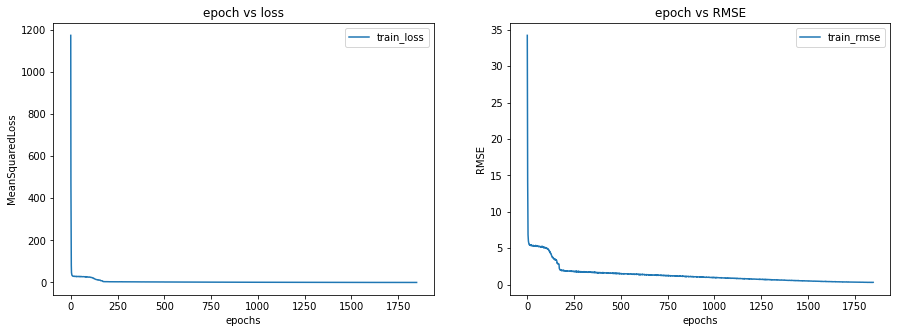

<Figure size 432x288 with 0 Axes>

In [9]:
# plot epoch vs loss, epoch vs RMSE
plt.figure(figsize=(15,5))

epochs = len(model_history.history['loss'])

plt.subplot(1,2,1)
plt.plot(np.arange(0,epochs,1), model_history.history['loss'], '-', label='train_loss')
#plt.plot(np.arange(0,epochs,1), model_history.history['val_loss'], '--', label='val_loss', )
plt.xlabel('epochs')
plt.ylabel('MeanSquaredLoss')
plt.title('epoch vs loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0,epochs,1), model_history.history['root_mean_squared_error'], '-', label='train_rmse')
#plt.plot(np.arange(0,epochs,1), model_history.history['val_root_mean_squared_error'], '--', label='val_rmse')
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.title('epoch vs RMSE')
plt.legend()
plt.show()

plt.savefig(os.path.join(out_dir,'epoch_vs_loss.png'))

In [10]:
#model.evaluate(test_dataset)

# Sample Reconstruction

In [11]:
# Reconstruct 
z_reconstruct = np.linspace(0,8.5,100)
z_reconstruct = np.expand_dims(strided_app(z_reconstruct, 4, 4), axis=-1)

In [12]:
mu_reconstruct = model.predict(z_reconstruct)

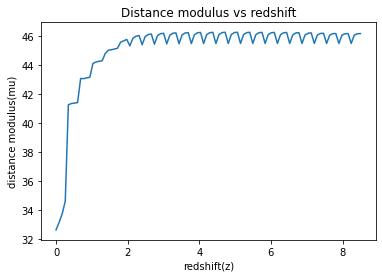

<Figure size 432x288 with 0 Axes>

In [13]:
# plot reconstructed z vs mu
plt.plot(z_reconstruct.flatten(), mu_reconstruct.flatten());
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('Distance modulus vs redshift')
plt.show()

plt.savefig(os.path.join(out_dir,'sample_reconstruction.png'))

# Sample Reconstruction with uncertainity

In [23]:
model_u = model_uncertainity()

In [25]:
model_u.load_weights(os.path.join(out_dir,'cp.ckpt'))

In [26]:
model_u.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.RootMeanSquaredError())

In [29]:
mu_reconstruct_uncertainity = []
n = 1000
for i in range(n):
    mu_reconstruct_uncertainity.append(model_u.predict(z_reconstruct, batch_size=128).flatten())

mu_reconstruct_uncertainity = np.array(mu_reconstruct_uncertainity)
mean = np.mean(mu_reconstruct_uncertainity, axis=0)
std_dev = np.std(mu_reconstruct_uncertainity, axis=0)

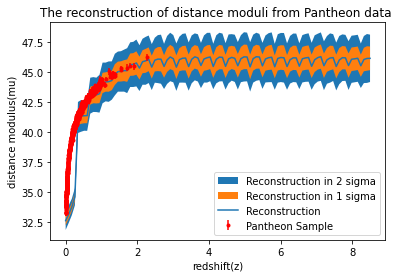

<Figure size 432x288 with 0 Axes>

In [28]:
plt.fill_between(z_reconstruct.flatten(), mean-2*std_dev, mean+2*std_dev,label='Reconstruction in 2 sigma')
plt.fill_between(z_reconstruct.flatten(), mean-1*std_dev, mean+1*std_dev,label='Reconstruction in 1 sigma')

plt.plot(z_reconstruct.flatten(), mean, label='Reconstruction')
plt.errorbar(z, mu, yerr=mu_err, fmt='.r', label='Pantheon Sample');
plt.xlabel('redshift(z)')
plt.ylabel('distance modulus(mu)')
plt.title('The reconstruction of distance moduli from Pantheon data ')
plt.legend()
plt.show()

plt.savefig(os.path.join(out_dir,'sample_reconstruction_with_uncertainity.png'))